## 二叉搜索树中第K小的元素
---
给定一个二叉搜索树，编写一个函数 kthSmallest 来查找其中第 `k`个最小的元素。  
**说明：**
你可以假设 k 总是有效的，1 ≤ k ≤ 二叉搜索树元素个数。  
**示例 1:**  
```
输入: root = [3,1,4,null,2], k = 1
   3
  / \
 1   4
  \
   2
输出: 1
```
**示例 2:**
```
输入: root = [5,3,6,2,4,null,null,1], k = 3
       5
      / \
     3   6
    / \
   2   4
  /
 1
输出: 3


```
进阶：
如果二叉搜索树经常被修改（插入/删除操作）并且你需要频繁地查找第 k 小的值，你将如何优化 kthSmallest 函数？

## 230.中序遍历(递归)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def __init__(self):
        self.q=[]
    def kthSmallest(self, root: TreeNode, k: int) -> int:
        def Inorder(root):
            if root!=None:
                Inorder(root.left)
                self.q.append(root.val)
                #if len(self.q)>=k:
                #    return
                Inorder(root.right)
        Inorder(root)
        print(self.q)
        return self.q[k-1]

In [ ]:
class Solution:
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        def inorder(r):
            return inorder(r.left) + [r.val] + inorder(r.right) if r else []
    
        return inorder(root)[k - 1]


### 迭代

In [2]:
class Solution:
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        stack = []
        
        while True:
            while root:
                stack.append(root)
                root = root.left
            root = stack.pop()
            k -= 1
            if not k:
                return root.val
            root = root.right



## 236.二叉树的最近公共祖先
---
给定一个二叉树, 找到该树中两个指定节点的最近公共祖先。

百度百科中最近公共祖先的定义为：“对于有根树 T 的两个结点 p、q，最近公共祖先表示为一个结点 x，满足 x 是 p、q 的祖先且 x 的深度尽可能大（一个节点也可以是它自己的祖先）。”

例如，给定如下二叉树:  root = [3,5,1,6,2,0,8,null,null,7,4]

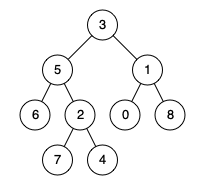
**示例 1:**
输入: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1
输出: 3
解释: 节点 5 和节点 1 的最近公共祖先是节点 3。

**示例 2:**
输入: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4
输出: 5
解释: 节点 5 和节点 4 的最近公共祖先是节点 5。因为根据定义最近公共祖先节点可以为节点本身。  
**说明:**

所有节点的值都是唯一的。
p、q 为不同节点且均存在于给定的二叉树中。



### 方法一：递归

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        self.ans = None
        def dfs(rt,pp,qq):
            if rt == None: return False
            ls =dfs(rt.left,pp,qq)
            rs =dfs(rt.right,pp,qq)
            if ((ls and rs) or ((rt.val == pp.val or rt.val==qq.val) and (ls or rs))):
                self.ans=rt
            return ls or rs or (rt.val==qq.val or rt.val==pp.val)
        dfs(root,p,q)
        return self.ans

### 方法二：存储父节点

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        from collections import defaultdict
        self.fa = {}
        self.vis = defaultdict(bool)
        
        def dfs(tree):
            if tree.left:
                self.fa[tree.left.val] = tree
                dfs(tree.left)
            if tree.right:
                self.fa[tree.right.val] = tree
                dfs(tree.right)
        dfs(root)
        self.fa[root.val]=None
        while self.fa[p.val]:
            self.vis[p.val]=True
            p = self.fa[p.val]
        while self.fa[q.val]:
            if self.vis[q.val]==True:
                break
            q =self.fa[q.val]
        return q


## 297.二叉树的序列化与反序列化
---
- 序列化是将一个数据结构或者对象转换为连续的比特位的操作，进而可以将转换后的数据存储在一个文件或者内存中，同时也可以通过网络传输到另一个计算机环境，采取相反方式重构得到原数据。
- 请设计一个算法来实现二叉树的序列化与反序列化。这里不限定你的序列 / 反序列化算法执行逻辑，你只需要保证一个二叉树可以被序列化为一个字符串并且将这个字符串反序列化为原始的树结构。

**示例:**
```
你可以将以下二叉树：

    1
   / \
  2   3
     / \
    4   5

序列化为 "[1,2,3,null,null,4,5]"


```
提示: 这与 LeetCode 目前使用的方式一致，详情请参阅 LeetCode 序列化二叉树的格式。你并非必须采取这种方式，你也可以采用其他的方法解决这个问题。

说明: 不要使用类的成员 / 全局 / 静态变量来存储状态，你的序列化和反序列化算法应该是无状态的。


In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        if root==None:
            return ''
        seq =[]
        seq.append(root)
        seq_tree =[]
        while len(seq)>0:
            #print(len(seq))
            node = seq.pop(0)
            #print(len(seq))
            
            if node!=None:
                seq_tree.append(str(node.val))
                seq.append(node.left)
                seq.append(node.right)
            else:
                seq_tree.append('None')
        while seq_tree[-1]=='None':
            seq_tree.pop()
        print(seq_tree)
        return ' '.join(seq_tree)

        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        #print(data)
        if len(data)==0:
            return None
        data = data.split()
        #print(data)
        i,c=0,0
        root = TreeNode(data[0])
        seq = []
        seq.append(root)
        for n,d in enumerate(data):
            node =seq.pop(0)
            if node !='None' and node!=None:
                if c+1<len(data):
                    if data[c+1]!='None':
                        node.left = TreeNode(data[c+1])
                    seq.append(node.left)
                if c+2<len(data):
                    if data[c+2]!='None':
                        node.right = TreeNode(data[c+2])
                    seq.append(node.right)
                c=c+2
        return root


# Your Codec object will be instantiated and called as such:
# codec = Codec()
# codec.deserialize(codec.serialize(root))

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        if root==None:
            return ''
        seq =[]
        seq.append(root)
        seq_tree =[]
        while len(seq)>0:
            #print(len(seq))
            node = seq.pop(0)
            #print(len(seq))
            
            if node!=None:
                seq_tree.append(str(node.val))
                seq.append(node.left)
                seq.append(node.right)
            else:
                seq_tree.append('None')
        while seq_tree[-1]=='None':
            seq_tree.pop()
        print(seq_tree)
        return ' '.join(seq_tree)

        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        #print(data)
        if len(data)==0:
            return None
        data = data.split()
        #print(data)
        i,c=0,0
        root = TreeNode(data[0])
        seq = []
        seq.append(root)
        for n,d in enumerate(data):
            node =seq.pop(0)
            if node !='None':
                if c+1<len(data):
                    if data[c+1]!='None':
                        node.left = TreeNode(data[c+1])
                        seq.append(node.left)
                    else:seq.append('None')
                if c+2<len(data):
                    if data[c+2]!='None':
                        node.right = TreeNode(data[c+2])
                        seq.append(node.right)
                    else:seq.append('None')
                c=c+2
        return root


# Your Codec object will be instantiated and called as such:
# codec = Codec()
# codec.deserialize(codec.serialize(root))

## 218.天际线问题
---
城市的天际线是从远处观看该城市中所有建筑物形成的轮廓的外部轮廓。现在，假设您获得了城市风光照片(图A)上显示的所有建筑物的位置和高度，请编写一个程序以输出由这些建筑物形成的天际线(图B)
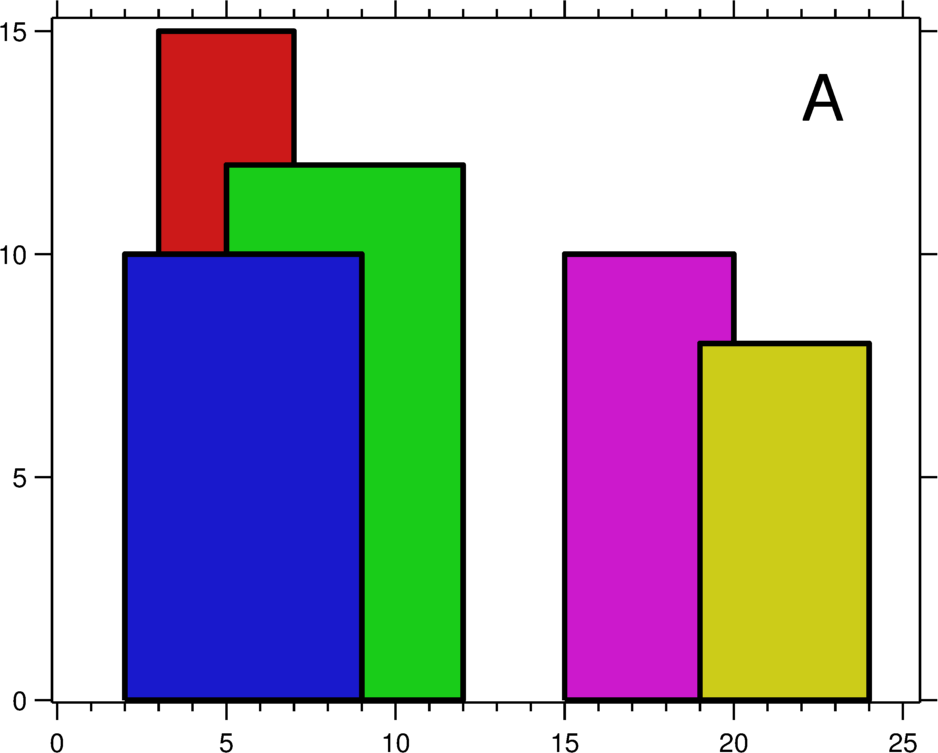
每个建筑物的几何信息用三元组```[Li,Ri,Hi]```表示，其中`Li`和`Ri`分别是第i座建筑物左右边缘的x坐标，`Hi`是其高度。可以保证$ 0\leq{Li,Ri}\leq{INT\_MAX}$ 和 $Ri - Li > 0$。您可以假设所有建筑物都是在绝对平坦且高度为0的表面上的完美矩形。  
例如，图A中所有建筑物的尺寸记录为：`[[2 9 10],[3 7 15],[5 12 12],[15 20 10],[19 24 8]]`。  
输出是以 `[ [x1,y1],[x2,y2],[x3,y3],...]`格式的“关键点”(图B中的红点)的列表，它们唯一地定义了天际线。关键点是水平线段的左端点。请注意，最右侧建筑物最后一个关键点仅用于标记天际线的终点，并始终为零高度。此外，任何两个相邻建筑物之间的地面都应被视为天际线轮廓的一部分。  
例如，图B中的天际线应该表示为：[ [2 10], [3 15], [7 12], [12 0], [15 10], [20 8], [24, 0] ]。  
**说明：**
- 任何输入列表中的建筑物数量保证在 [0, 10000] 范围内。
- 输入列表已经按左 x 坐标 Li  进行升序排列。
- 输出列表必须按 x 位排序。
- 输出天际线中不得有连续的相同高度的水平线。例如 [...[2 3], [4 5], [7 5], [11 5], [12 7]...] 是不正确的答案；三条高度为 5 的线应该在最终输出中合并为一个：[...[2 3], [4 5], [12 7], ...]


### 方法：[分治](https://leetcode-cn.com/problems/the-skyline-problem/solution/tian-ji-xian-wen-ti-by-leetcode/)

In [ ]:
class Solution:
    def getSkyline(self, buildings: 'List[List[int]]') -> 'List[List[int]]':
        """
        Divide-and-conquer algorithm to solve skyline problem,
        which is similar with the merge sort algorithm.
        """
        n = len(buildings)
        # The base cases
        if n == 0:
            return []
        if n == 1:
            x_start, x_end, y = buildings[0]
            return [[x_start, y], [x_end, 0]] 
         
        # If there is more than one building, 
        # recursively divide the input into two subproblems.
        left_skyline = self.getSkyline(buildings[: n // 2])
        right_skyline = self.getSkyline(buildings[n // 2 :])
        
        # Merge the results of subproblem together.
        return self.merge_skylines(left_skyline, right_skyline)
    
    def merge_skylines(self, left, right):
        """
        Merge two skylines together.
        """
        def update_output(x, y):
            """
            Update the final output with the new element.
            """
            # if skyline change is not vertical - 
            # add the new point
            if not output or output[-1][0] != x:
                output.append([x, y])
            # if skyline change is vertical - 
            # update the last point
            else:
                output[-1][1] = y
        
        def append_skyline(p, lst, n, y, curr_y):
            """
            Append the rest of the skyline elements with indice (p, n)
            to the final output.
            """
            while p < n: 
                x, y = lst[p]
                p += 1
                if curr_y != y:
                    update_output(x, y)
                    curr_y = y
                
        n_l, n_r = len(left), len(right)
        p_l = p_r = 0
        curr_y  = left_y = right_y = 0
        output = []
            
        # while we're in the region where both skylines are present
        while p_l < n_l and p_r < n_r:
            point_l, point_r = left[p_l], right[p_r]
            # pick up the smallest x
            if point_l[0] < point_r[0]: 
                x, left_y = point_l
                p_l += 1
            else: 
                x, right_y = point_r 
                p_r += 1
            # max height (i.e. y) between both skylines
            max_y = max(left_y, right_y)
            # if there is a skyline change
            if curr_y != max_y:
                update_output(x, max_y)
                curr_y = max_y

        # there is only left skyline
        append_skyline(p_l, left, n_l, left_y, curr_y)

        # there is only right skyline
        append_skyline(p_r, right, n_r, right_y, curr_y)
                
        return output


### 扫描线法

In [ ]:
class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:
        from bisect import bisect_left, insort_left
        sorted_list = [0]
        points = []
        for l,r,h in buildings:
            points.append([l, -h])
            points.append([r, h])
        points.sort()
        
        ret = []
        last = [0, 0]
        for x,h in points:
            if h<0:
                insort_left(sorted_list, -h)
            else:
                idx = bisect_left(sorted_list, h)
                sorted_list.pop(idx)

            maxHeight = sorted_list[-1] # 由于是单调递增序列，最后一个为最大值
            if last[1] != maxHeight:
                last = [x, maxHeight]
                ret.append(last)
        return ret
